# Importing the libraries

In [2]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
%matplotlib inline

# Importing data

[Source: data.gov](https://catalog.data.gov/dataset/consumer-complaint-database)

In [4]:

df = pd.read_csv('Complaints.csv')
df = df[:50000]

In [5]:
df.head()


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2020-09-15,Credit card or prepaid card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Card was charged for something you did not pur...,NaN,Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,NaN,NaN,Older American,NaN,Postal mail,2020-11-05,Closed with explanation,Yes,NaN,3849740
1,2019-09-24,Debt collection,I do not know,Attempts to collect debt not owed,Debt is not yours,transworld systems inc. \nis trying to collect...,NaN,TRANSWORLD SYSTEMS INC,FL,335XX,NaN,Consent provided,Web,2019-09-24,Closed with explanation,Yes,NaN,3384392
2,2019-09-19,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,PA,15206,NaN,Consent not provided,Web,2019-09-20,Closed with non-monetary relief,Yes,NaN,3379500
3,2019-11-08,Debt collection,I do not know,Communication tactics,Frequent or repeated calls,"Over the past 2 weeks, I have been receiving e...",NaN,"Diversified Consultants, Inc.",NC,275XX,NaN,Consent provided,Web,2019-11-08,Closed with explanation,Yes,NaN,3433198
4,2019-09-15,Debt collection,Other debt,Attempts to collect debt not owed,Debt was result of identity theft,Pioneer has committed several federal violatio...,NaN,Pioneer Capital Solutions Inc,CA,925XX,NaN,Consent provided,Web,2019-09-15,Closed with explanation,Yes,NaN,3374555


## Check features name

In [6]:
df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [7]:
df.count()

Date received                   50000
Product                         50000
Sub-product                     49935
Issue                           50000
Sub-issue                       43626
Consumer complaint narrative    16854
Company public response         29026
Company                         50000
State                           48073
ZIP code                        44076
Tags                             6516
Consumer consent provided?      39274
Submitted via                   50000
Date sent to company            50000
Company response to consumer    50000
Timely response?                50000
Consumer disputed?                272
Complaint ID                    50000
dtype: int64

There is no missing valuse

# Creating subset data

Make subset data only contains "Consumer_complaint_narrative" as the attribute, "product" as the output target.

In [8]:
from io import StringIO
col = ['Product', 'Consumer complaint narrative']
df = df[col]
df = df[pd.notnull(df['Consumer complaint narrative'])]
df.columns = ['Product', 'Consumer_complaint_narrative']
df['category_id'] = df['Product'].factorize()[0]
category_id_df = df[['Product', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Product']].values)
df.head()

,Product,Consumer_complaint_narrative,category_id
1,Debt collection,transworld systems inc. \nis trying to collect...,0
3,Debt collection,"Over the past 2 weeks, I have been receiving e...",0
4,Debt collection,Pioneer has committed several federal violatio...,0
9,"Credit reporting, credit repair services, or o...","Previously, on XX/XX/XXXX, XX/XX/XXXX, and XX/...",1
10,"Credit reporting, credit repair services, or o...",Hello This complaint is against the three cred...,1


### Check how many categories of compliants.

In [9]:
df["category_id"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

This is a multinomial variant

In [10]:
df["Product"].unique()

array(['Debt collection',
       'Credit reporting, credit repair services, or other personal consumer reports',
       'Money transfer, virtual currency, or money service', 'Mortgage',
       'Vehicle loan or lease', 'Student loan',
       'Credit card or prepaid card', 'Checking or savings account',
       'Credit card', 'Payday loan, title loan, or personal loan',
       'Consumer Loan', 'Payday loan'], dtype=object)

In [11]:
df['Consumer_complaint_narrative'].head()

1     transworld systems inc. \nis trying to collect...
3     Over the past 2 weeks, I have been receiving e...
4     Pioneer has committed several federal violatio...
9     Previously, on XX/XX/XXXX, XX/XX/XXXX, and XX/...
10    Hello This complaint is against the three cred...
Name: Consumer_complaint_narrative, dtype: object

# Product Classes Visualization

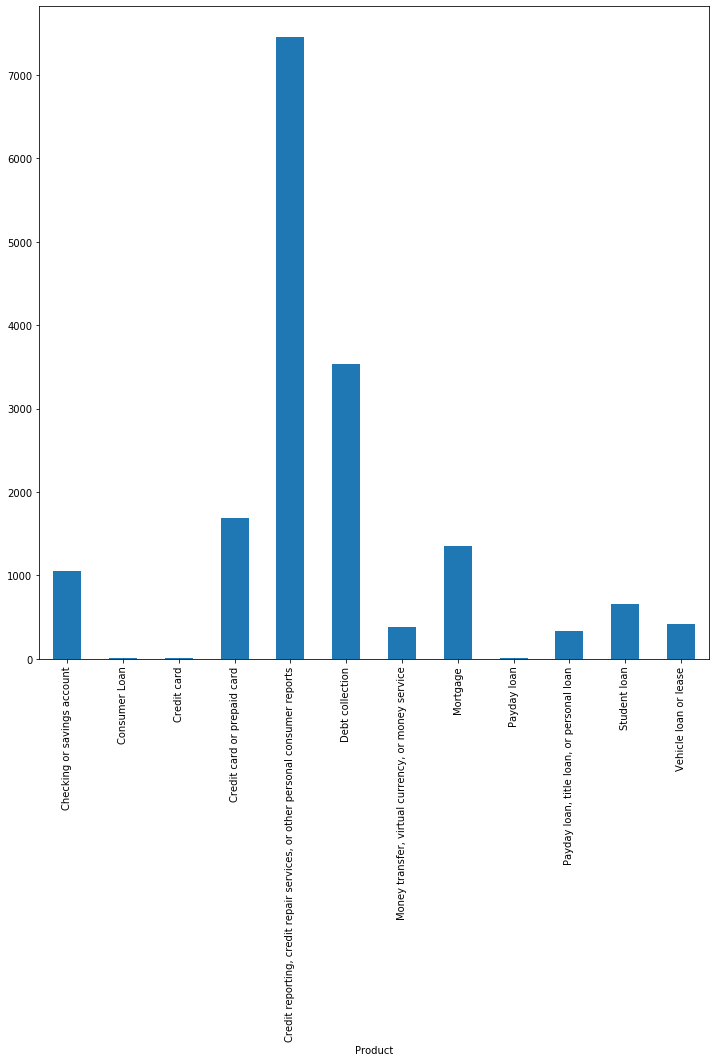

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,12))
df.groupby('Product').Consumer_complaint_narrative.count().plot.bar(ylim=0)
plt.show()

# Text Representation

Using tf-idf method to create Bag of Words.
sublinear_df is set to True to use a logarithmic form for frequency.
min_df is the minimum numbers of documents a word must be present in to be kept.
norm is set to l2, to ensure all our feature vectors have a euclidian norm of 1.
ngram_range is set to (1, 2) to indicate that we want to consider both unigrams and bigrams.
stop_words is set to "english" to remove all common pronouns ("a", "the", ...) to reduce the number of noisy features.


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.Consumer_complaint_narrative).toarray()
labels = df.category_id
features.shape

(16854, 45354)

In [14]:
df[['Product', 'Consumer_complaint_narrative', 'category_id']]
df.describe()
df.transpose()

,1,3,4,9,10,14,16,17,18,24,...,49984,49988,49989,49990,49994,49995,49996,49997,49998,49999
Product,Debt collection,Debt collection,Debt collection,"Credit reporting, credit repair services, or o...","Credit reporting, credit repair services, or o...","Credit reporting, credit repair services, or o...","Credit reporting, credit repair services, or o...","Credit reporting, credit repair services, or o...","Credit reporting, credit repair services, or o...","Credit reporting, credit repair services, or o...",...,Credit card or prepaid card,Checking or savings account,"Credit reporting, credit repair services, or o...","Credit reporting, credit repair services, or o...",Debt collection,"Credit reporting, credit repair services, or o...","Credit reporting, credit repair services, or o...",Mortgage,Debt collection,"Credit reporting, credit repair services, or o..."
Consumer_complaint_narrative,transworld systems inc. \nis trying to collect...,"Over the past 2 weeks, I have been receiving e...",Pioneer has committed several federal violatio...,"Previously, on XX/XX/XXXX, XX/XX/XXXX, and XX/...",Hello This complaint is against the three cred...,Today XX/XX/XXXX went online to dispute the in...,XXXX is reporting incorrectly to Equifax and X...,Please reverse the late payments reported on t...,i am a victim of identity theft as previously ...,"Experian, XXXX and XXXX are reporting inaccura...",...,On XX/XX/2019 I bought a Visa gift card from X...,I was a loyal customer of Wells Fargo banking ...,I contacted Grant & Weber collection agency to...,There is another item that popped up on my cre...,I have been receiving harassing phone calls fr...,"I searched for "" free credit reports '' on XXX...","Notice to whom it be of concern, It is YOU I h...","The Specialized loan Servicing, LLC ( "" SLS ''...",The creditor CITIBANK ( aka CITI Simplicity cr...,In XXXX of XXXX I was the victim of identity t...
category_id,0,0,0,1,1,1,1,1,1,1,...,6,7,1,1,0,1,1,3,0,1


In [15]:
df.describe()

,category_id
count,16854.000000
mean,2.236917
std,2.430460
min,0.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,11.000000


In [16]:
df.transpose()

,1,3,4,9,10,14,16,17,18,24,...,49984,49988,49989,49990,49994,49995,49996,49997,49998,49999
Product,Debt collection,Debt collection,Debt collection,"Credit reporting, credit repair services, or o...","Credit reporting, credit repair services, or o...","Credit reporting, credit repair services, or o...","Credit reporting, credit repair services, or o...","Credit reporting, credit repair services, or o...","Credit reporting, credit repair services, or o...","Credit reporting, credit repair services, or o...",...,Credit card or prepaid card,Checking or savings account,"Credit reporting, credit repair services, or o...","Credit reporting, credit repair services, or o...",Debt collection,"Credit reporting, credit repair services, or o...","Credit reporting, credit repair services, or o...",Mortgage,Debt collection,"Credit reporting, credit repair services, or o..."
Consumer_complaint_narrative,transworld systems inc. \nis trying to collect...,"Over the past 2 weeks, I have been receiving e...",Pioneer has committed several federal violatio...,"Previously, on XX/XX/XXXX, XX/XX/XXXX, and XX/...",Hello This complaint is against the three cred...,Today XX/XX/XXXX went online to dispute the in...,XXXX is reporting incorrectly to Equifax and X...,Please reverse the late payments reported on t...,i am a victim of identity theft as previously ...,"Experian, XXXX and XXXX are reporting inaccura...",...,On XX/XX/2019 I bought a Visa gift card from X...,I was a loyal customer of Wells Fargo banking ...,I contacted Grant & Weber collection agency to...,There is another item that popped up on my cre...,I have been receiving harassing phone calls fr...,"I searched for "" free credit reports '' on XXX...","Notice to whom it be of concern, It is YOU I h...","The Specialized loan Servicing, LLC ( "" SLS ''...",The creditor CITIBANK ( aka CITI Simplicity cr...,In XXXX of XXXX I was the victim of identity t...
category_id,0,0,0,1,1,1,1,1,1,1,...,6,7,1,1,0,1,1,3,0,1


In [17]:
textdf = df.transpose()

In [18]:
textdf.iloc[1,1]

'Over the past 2 weeks, I have been receiving excessive amounts of telephone calls from the company listed in this complaint. The calls occur between XXXX XXXX and XXXX XXXX to my cell and at my job. The company does not have the right to harass me at work and I want this to stop. It is extremely distracting to be told 5 times a day that I have a call from this collection agency while at work.'

## Save cleaned subset data



In [19]:
df.to_pickle("Complaints_cleaned.pkl")

### Using Chi2 method to find the terms that are the most correlated with each of the producrs

In [20]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for Product, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Product))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'Checking or savings account':
  . Most correlated unigrams:
. overdraft
. deposit
  . Most correlated bigrams:
. savings account
. checking account
# 'Consumer Loan':
  . Most correlated unigrams:
. phishing
. temp
  . Most correlated bigrams:
. 2016 received
. xxxx hang
# 'Credit card':
  . Most correlated unigrams:
. forged
. macy
  . Most correlated bigrams:
. rented car
. car company
# 'Credit card or prepaid card':
  . Most correlated unigrams:
. express
. card
  . Most correlated bigrams:
. american express
. credit card
# 'Credit reporting, credit repair services, or other personal consumer reports':
  . Most correlated unigrams:
. reporting
. report
  . Most correlated bigrams:
. identity theft
. credit report
# 'Debt collection':
  . Most correlated unigrams:
. collection
. debt
  . Most correlated bigrams:
. debt collector
. collect debt
# 'Money transfer, virtual currency, or money service':
  . Most correlated unigrams:
. tickets
. paypal
  . Most correlated bigrams:
. p

# Multi-Class Classifier: Features and Design


Using Naive Bayes Classifier algorithms to train multinomial variant classifiers. 

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(df['Consumer_complaint_narrative'], df['Product'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

### Make some predictions

In [22]:
print(clf.predict(count_vect.transform(["This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."])))

['Credit reporting, credit repair services, or other personal consumer reports']


In [23]:
print(clf.predict(count_vect.transform(["I am disputing the inaccurate information the Chex-Systems has on my credit report. I initially submitted a police report on XXXX/XXXX/16 and Chex Systems only deleted the items that I mentioned in the letter and not all the items that were actually listed on the police report. In other words they wanted me to say word for word to them what items were fraudulent. The total disregard of the police report and what accounts that it states that are fraudulent. If they just had paid a little closer attention to the police report I would not been in this position now and they would n't have to research once again. I would like the reported information to be removed : XXXX XXXX XXXX"])))

['Credit reporting, credit repair services, or other personal consumer reports']


Copy the complaint that in the textdf.iloc[1,1] to check the accuracy.

In [24]:
df[df['Consumer_complaint_narrative'] == 
   "Over the past 2 weeks, I have been receiving excessive amounts of telephone calls from the company listed in this complaint. The calls occur between XXXX XXXX and XXXX XXXX to my cell and at my job. The company does not have the right to harass me at work and I want this to stop. It is extremely distracting to be told 5 times a day that I have a call from this collection agency while at work."]

,Product,Consumer_complaint_narrative,category_id
3,Debt collection,"Over the past 2 weeks, I have been receiving e...",0


# Model Selection

We will benchmark the following four models:
Logistic Regression,
(Multinomial) Naive Bayes,
Linear Support Vector Machine,
Random Forest.

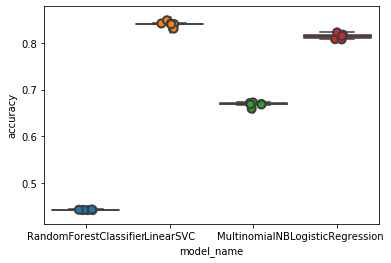

In [25]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 6
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()


In [26]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.840455
LogisticRegression        0.814232
MultinomialNB             0.668149
RandomForestClassifier    0.442270
Name: accuracy, dtype: float64

I tried CV = 4, CV = 5, CV = 6 and CV = 7. CV 6 get the highes average accuracy. LinearSVC and Logistic Regression perform better than the other two classifiers, with LinearSVC having a slight advantage with a median accuracy of around 84%.

# Model Evaluation


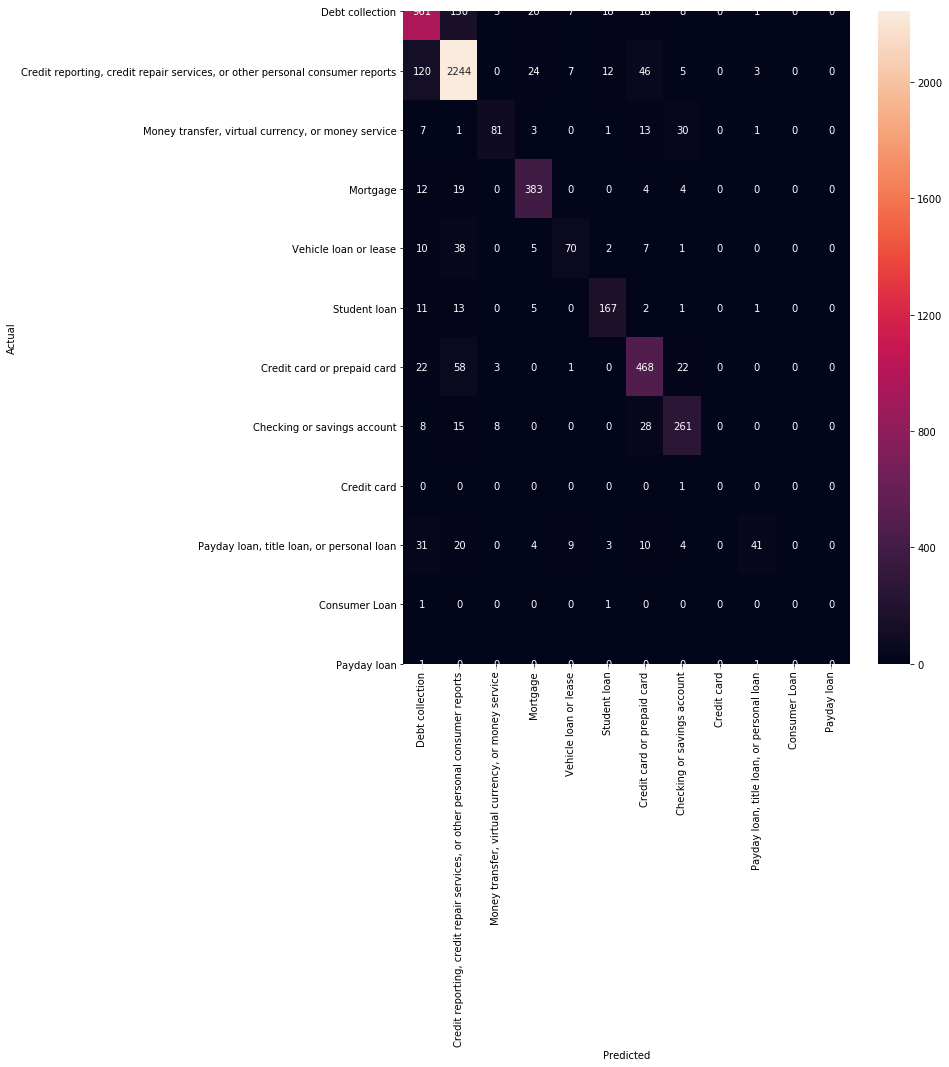

In [27]:

model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,12))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Product.values, yticklabels=category_id_df.Product.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

The vast majority of the predictions end up on the diagonal (predicted label = actual label), where we want them to be. However, there are a number of misclassifications, and it might be interesting to see what those are caused by:


In [29]:
from IPython.display import display
for predicted in category_id_df.category_id:
  for actual in category_id_df.category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 10:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['Product', 'Consumer_complaint_narrative']])
      print('')

'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Debt collection' : 120 examples.


,Product,Consumer_complaint_narrative
37462,"Credit reporting, credit repair services, or o...","Complaint number : XXXX, submitted letter on X..."
33348,"Credit reporting, credit repair services, or o...",I have requested multiple times for this accou...
12264,"Credit reporting, credit repair services, or o...","To Whom It May Concern, The reason for my disp..."
10625,"Credit reporting, credit repair services, or o...",I paid Source Receivables Management {$250.00}...
16471,"Credit reporting, credit repair services, or o...","Affidavit was filed XX/XX/XXXX, disputes XX/XX..."
...,...,...
38824,"Credit reporting, credit repair services, or o...",Waypoint Resource group is falsely reporting a...
20175,"Credit reporting, credit repair services, or o...",Send in a Dispute for written contract and the...
45185,"Credit reporting, credit repair services, or o...","XXXX XXXX XXXX was paid in full by XXXX XXXX, ..."
38809,"Credit reporting, credit repair services, or o...",I received an email from XXXX XXXX stating th...



'Mortgage' predicted as 'Debt collection' : 12 examples.


,Product,Consumer_complaint_narrative
29682,Mortgage,NOTICE : Filing on behalf of XXXX XXXX XXXX an...
23539,Mortgage,I have spoken with a banker at swan Financial...
14933,Mortgage,I submitted my information on XXXX on XX/XX/19...
33678,Mortgage,I received a letter dated XX/XX/2019 stating t...
5106,Mortgage,"Good Morning, I have a complaint about my form..."
28375,Mortgage,when I first notice that I was going to run in...
36983,Mortgage,I opened a home equity line of credit with Cit...
38183,Mortgage,This complaint follows two previous complaints...
38782,Mortgage,"XX/XX/XXXX, there was a charge of {$35.00} to ..."
27289,Mortgage,The loan company will not send the monthly sta...



'Vehicle loan or lease' predicted as 'Debt collection' : 10 examples.


,Product,Consumer_complaint_narrative
35367,Vehicle loan or lease,I have retained a bankruptcy lawyer and I noti...
43525,Vehicle loan or lease,According to California Law my the repossessio...
39043,Vehicle loan or lease,In XX/XX/XXXX I bought a XXXX XXXX XXXX from X...
49081,Vehicle loan or lease,I filed chapter XXXX bankruptcy in XXXX a comu...
27924,Vehicle loan or lease,I purchased and financed a vehicle in XX/XX/XX...
28552,Vehicle loan or lease,First investors recently took over loans for X...
30654,Vehicle loan or lease,Please read the attached letter I wrote to the...
31276,Vehicle loan or lease,"My vehicle was totaled on XX/XX/2019, and my i..."
44056,Vehicle loan or lease,I am on XXXX XXXX military XXXX and sent in d...
32503,Vehicle loan or lease,Robocalls would start 5 days ahead of due date...



'Student loan' predicted as 'Debt collection' : 11 examples.


,Product,Consumer_complaint_narrative
33438,Student loan,Apparently I have a student loan over 33 years...
45959,Student loan,Im in collections i dont make enough to make p...
48138,Student loan,"My ex husband from a divorce 19 years ago, nam..."
21267,Student loan,Navient is the loan provider. They call me at ...
47435,Student loan,Beginning XX/XX/2019 my co-signer and I began ...
26341,Student loan,I called National Credit Services everyday bec...
26979,Student loan,For the last five years a company called Condu...
40167,Student loan,Some of the specific disputes I have are. I ha...
44322,Student loan,I have 4 loans with Navient. 3 of them are cur...
48129,Student loan,MY PAYROLL CHECK IS GARNISHED BY PIONEER RECOV...



'Credit card or prepaid card' predicted as 'Debt collection' : 22 examples.


,Product,Consumer_complaint_narrative
20987,Credit card or prepaid card,I would like my Discover account to send proof...
39112,Credit card or prepaid card,"On XX/XX/2019, I spoke with, XXXX, a represent..."
38354,Credit card or prepaid card,"Capital One has responded I see, and with cons..."
43846,Credit card or prepaid card,"In XXXX of 2019, I received a XXXX XXXX notifi..."
40340,Credit card or prepaid card,"On XX/XX/2019, I mailed a certified letter to ..."
33615,Credit card or prepaid card,I contacted your CEO at XXXX on XX/XX/XXXX at ...
3392,Credit card or prepaid card,"On or around XX/XX/2019, I reached out to XXXX..."
43729,Credit card or prepaid card,I'm having trouble making payments on my XXXX ...
43026,Credit card or prepaid card,I had a financial change and have tried on mul...
3014,Credit card or prepaid card,After receiving credit card to home address fr...



'Payday loan, title loan, or personal loan' predicted as 'Debt collection' : 31 examples.


,Product,Consumer_complaint_narrative
36513,"Payday loan, title loan, or personal loan",Rude staff who talk to you like your 5 years o...
28384,"Payday loan, title loan, or personal loan",I received a payday loan from Advance America ...
47344,"Payday loan, title loan, or personal loan",I placed a stop payment on my loan with this c...
14124,"Payday loan, title loan, or personal loan","On XX/XX/19, I received a notice in the mail f..."
24992,"Payday loan, title loan, or personal loan",I have been making payments on my loan with Le...
11106,"Payday loan, title loan, or personal loan",Company continues to call and harass about col...
25314,"Payday loan, title loan, or personal loan",They are charging me almost 800 % interest. I ...
32532,"Payday loan, title loan, or personal loan",Attempted to switch account after closing orig...
46377,"Payday loan, title loan, or personal loan",I applied for a loan with Loan Till Payday in ...
28726,"Payday loan, title loan, or personal loan",Today on XXXX XXXX the company called security...



'Debt collection' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 150 examples.


,Product,Consumer_complaint_narrative
16403,Debt collection,Cbna/Sears I have never had an account with th...
26737,Debt collection,I have attached a copy of the Consumer Financi...
44543,Debt collection,I had XXXX XXXX for approximately 4 years. In ...
32296,Debt collection,"On Account information disputed by consumer, m..."
28996,Debt collection,ON XX/XX/13 I PAID MY TOTAL CHILD SUPPORT OFF ...
...,...,...
41711,Debt collection,I bought a vehicle and had to pay the second d...
26258,Debt collection,I have contacted XXXX & XXXX several times pro...
42119,Debt collection,The original creditor XXXX XXXX XXXX opened th...
33123,Debt collection,I looked on my credit report and I never heard...



'Mortgage' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 19 examples.


,Product,Consumer_complaint_narrative
9152,Mortgage,Bayview Loan Servicing is incorrectly reportin...
41056,Mortgage,Yes I pod my house in full via wire transfer f...
5653,Mortgage,I have a loan with CARNGTN MTG. I have always ...
46172,Mortgage,Seterus reported that I was late on my mortgag...
4126,Mortgage,The HEL is under my mother - in- law 's name X...
25280,Mortgage,Can not refinance due to previous bankruptcy i...
6403,Mortgage,We are victims of excessive Mortgage Fraud. It...
603,Mortgage,Wasapprovedfortrialmodificationwithmymortgages...
38274,Mortgage,I have late missed/late payments on my credit ...
28616,Mortgage,I am filing a complaint because the Money sour...



'Vehicle loan or lease' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 38 examples.


,Product,Consumer_complaint_narrative
7293,Vehicle loan or lease,Had an auto loan with Mitsubishi they say we w...
34709,Vehicle loan or lease,I have tried to find a solution with PenFed in...
30937,Vehicle loan or lease,My credit was used in a fraudulent transaction...
32974,Vehicle loan or lease,"Eastern Bank Auto Loan, was the bank I have my..."
17247,Vehicle loan or lease,This is my second issue with XXXX XXXXXXXX XXX...
45532,Vehicle loan or lease,I am writing to dispute the following informat...
40353,Vehicle loan or lease,This company is a predator on those who are st...
47579,Vehicle loan or lease,"I called on Tuesday, XX/XX/2019 and requested ..."
23937,Vehicle loan or lease,I have my auto loan with capital one since XX/...
39803,Vehicle loan or lease,In XX/XX/2017 an auto loan was taken out I fou...



'Student loan' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 13 examples.


,Product,Consumer_complaint_narrative
45070,Student loan,"Around XXXX of XXXX MOHELA, the company that b..."
41367,Student loan,I have been dealing with the company XXXX for ...
48119,Student loan,I have tried multiple times to get a hold of t...
45006,Student loan,Date XX/XX/XXXX - sent request to federal stud...
10239,Student loan,"As of XXXX, we were informed that I had been l..."
45970,Student loan,Filed Chapter XXXX bankruptcy 2016 and was dis...
16979,Student loan,It is showing that I have 9 student loan on my...
25873,Student loan,I have a huge problem with the way that my lat...
21738,Student loan,XXXX XXXX XXXX website is currently indicating...
17461,Student loan,I have a loan with NAVIENT. I have always made...



'Credit card or prepaid card' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 58 examples.


,Product,Consumer_complaint_narrative
46933,Credit card or prepaid card,This account is reporting incorrectly. I never...
40627,Credit card or prepaid card,I had a credit card with Macys and due to some...
28950,Credit card or prepaid card,XX/XX/2018 Credit Plus did not give them permi...
24773,Credit card or prepaid card,After filling out a pre-qualification form on ...
32902,Credit card or prepaid card,Sent two letters thru the mail stating that I ...
45419,Credit card or prepaid card,Want to know why account still shows on my cre...
27322,Credit card or prepaid card,I was notified by First Bankcard that my accou...
20114,Credit card or prepaid card,"CITIBANK VIOLATED "" FCRA, FDCPA AND FCBA '', T..."
10090,Credit card or prepaid card,I had over a million thank you points with Cit...
37567,Credit card or prepaid card,"On XX/XX/XXXX, Citibank responded to my compla..."



'Checking or savings account' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 15 examples.


,Product,Consumer_complaint_narrative
48012,Checking or savings account,I did a moving job and was paid with a check a...
45019,Checking or savings account,"On XX/XX/XXXX NCSECU in XXXX XXXX NC, executed..."
37312,Checking or savings account,Someone open a fraudulent account with my name...
44156,Checking or savings account,XXXX XXXX. I received a letter from Department...
1344,Checking or savings account,I am an employee working in XXXX XXXX XXXX. \n...
41160,Checking or savings account,Sometime in 2017 a checking account was opened...
19213,Checking or savings account,I received an email notification from Capital ...
26247,Checking or savings account,"On XX/XX/2019, I logged on to my XXXX XXXXXXXX..."
36197,Checking or savings account,ItriedforTHREEhourstobookaflightandpayviadebit...
41878,Checking or savings account,XX/XX/19 BMO Harris allowed my transfer of $ X...



'Payday loan, title loan, or personal loan' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 20 examples.


,Product,Consumer_complaint_narrative
30830,"Payday loan, title loan, or personal loan","On Thursday, XX/XX/2019 my vehicle, a XX/XX/XX..."
39172,"Payday loan, title loan, or personal loan",I attempted to check my credit score. My SSN w...
39081,"Payday loan, title loan, or personal loan",I applied due to electricity being turned off ...
12322,"Payday loan, title loan, or personal loan",XXXX Unethical practices. I was late due to Le...
49595,"Payday loan, title loan, or personal loan",I recently applied for loan at One Main Financ...
34702,"Payday loan, title loan, or personal loan",On my credit report from all three credit comp...
35950,"Payday loan, title loan, or personal loan",I had an account with XXXX XXXX XXXX since XX/...
25828,"Payday loan, title loan, or personal loan",Got the loan for XXXX around XX/XX/2018 and ha...
37526,"Payday loan, title loan, or personal loan",On XX/XX/17 I opened a self lender account- in...
25779,"Payday loan, title loan, or personal loan",The loan was originally with XXXX XXXX XXXX XX...



'Debt collection' predicted as 'Mortgage' : 20 examples.


,Product,Consumer_complaint_narrative
43082,Debt collection,Please see the attached detail complaint. My p...
33371,Debt collection,On XX/XX/2018 a lien against a property was pa...
33565,Debt collection,I have been dealing with Bayview loan services...
28045,Debt collection,Under FDCPA Section 807 ( 8 ) : XXXX XXXXXXXX ...
101,Debt collection,I received an email from a XXXX XXXX along wit...
14707,Debt collection,I dispute the amount owed by me to Select Port...
43651,Debt collection,Please allow me to respond to Select Portfolio...
1726,Debt collection,In XXXX I purchased a condo and the original c...
39742,Debt collection,COMPLAINT AND REQUEST FOR INVESTIGATION To : C...
21033,Debt collection,"First, I do not know who is BSI and had no bus..."



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Mortgage' : 24 examples.


,Product,Consumer_complaint_narrative
19525,"Credit reporting, credit repair services, or o...",I had my mortgage payment setup to automatical...
35442,"Credit reporting, credit repair services, or o...","I have been a customer of Kohls for many, many..."
34061,"Credit reporting, credit repair services, or o...",On XX/XX/2019 I received a call and email from...
551,"Credit reporting, credit repair services, or o...",I am writing this complaint due to the lack of...
23940,"Credit reporting, credit repair services, or o...",I am disputing my Principal Mortgage Balance t...
28973,"Credit reporting, credit repair services, or o...",We shopped for a new second mortgage for our c...
46032,"Credit reporting, credit repair services, or o...",I was several months late on my loan payment t...
28332,"Credit reporting, credit repair services, or o...",SunTrust Bank wrongfully reported a late payme...
20403,"Credit reporting, credit repair services, or o...",I was a victim of a fire that destroyed my hom...
44714,"Credit reporting, credit repair services, or o...",Wells Fargo Institutional Trust SVCS. Phone nu...



'Debt collection' predicted as 'Student loan' : 18 examples.


,Product,Consumer_complaint_narrative
23810,Debt collection,I am one of the victims of Ameritechs fraudule...
49074,Debt collection,I told Navient I could only pay {$50.00}. I am...
18486,Debt collection,"During the time period of XXXX, at age XXXX, I..."
16731,Debt collection,I was contacted by this company about a privat...
33766,Debt collection,The XXXX and XXXX months in XXXX indicate that...
23916,Debt collection,My sister in law was contacted by Navient rega...
36729,Debt collection,My husband and I were recently victims of cred...
23855,Debt collection,In XXXX of this XX/XX/2019 I received a letter...
37913,Debt collection,"On XX/XX/2014, I received a phone call regardi..."
3699,Debt collection,In XX/XX/XXXX I consolidated my student loans....



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Student loan' : 12 examples.


,Product,Consumer_complaint_narrative
8182,"Credit reporting, credit repair services, or o...",I have been trying to dispute this one student...
25248,"Credit reporting, credit repair services, or o...","Hi, I have recently found out through my credi..."
13197,"Credit reporting, credit repair services, or o...",My Student loan has been taken over by XXXX XX...
16208,"Credit reporting, credit repair services, or o...",On XXXX XXXX I received documentation that my ...
18037,"Credit reporting, credit repair services, or o...",Navient student loans My student loans from Na...
17967,"Credit reporting, credit repair services, or o...",XXXX recieved notice and proof of my XXXX and ...
33467,"Credit reporting, credit repair services, or o...",Ive had severe issues with the student loan pr...
22922,"Credit reporting, credit repair services, or o...","XX/XX/XXXX, I got laid off from my full time j..."
38968,"Credit reporting, credit repair services, or o...",I started going to XXXX in XXXX Colorado XX/XX...
49030,"Credit reporting, credit repair services, or o...",The year XX/XX/XXXX-XX/XX/XXXX Dept of Educati...



'Debt collection' predicted as 'Credit card or prepaid card' : 18 examples.


,Product,Consumer_complaint_narrative
39828,Debt collection,This kind of account is placed as a charged of...
16528,Debt collection,I am being harassed by Synchrony Bank for paym...
31239,Debt collection,My company uses American Express Global Busine...
30765,Debt collection,I have taken notes of dates and names and ever...
49998,Debt collection,The creditor CITIBANK ( aka CITI Simplicity cr...
49182,Debt collection,I recently applied for a credit card so I coul...
36463,Debt collection,I have taken notes of dates and names and ever...
46673,Debt collection,Capital One is reporting a business credit car...
41076,Debt collection,I contacted American Medical Collection Agency...
1128,Debt collection,This is a reverse credit card complaint. \n\nM...



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Credit card or prepaid card' : 46 examples.


,Product,Consumer_complaint_narrative
44530,"Credit reporting, credit repair services, or o...","On XX/XX/19, I filed a complaint with Capital ..."
37769,"Credit reporting, credit repair services, or o...",In XXXX of 2018 I filled out forms for a credi...
35479,"Credit reporting, credit repair services, or o...",I pulled my report from XXXX and it showed a c...
33387,"Credit reporting, credit repair services, or o...",After being in XXXX for a whole year I came ba...
30989,"Credit reporting, credit repair services, or o...",I get a monthly statement from Citi every mont...
10521,"Credit reporting, credit repair services, or o...",I have been a XXXX XXXX Credit Card customer f...
8934,"Credit reporting, credit repair services, or o...",On XX/XX/XXXX I contacted Bank of America Cred...
10854,"Credit reporting, credit repair services, or o...","I had a Comenity Bank credit card, through a c..."
33262,"Credit reporting, credit repair services, or o...",I was having a problem paying down my CC I cal...
49923,"Credit reporting, credit repair services, or o...",I am the owner of 3 small assisted living faci...



'Money transfer, virtual currency, or money service' predicted as 'Credit card or prepaid card' : 13 examples.


,Product,Consumer_complaint_narrative
32396,"Money transfer, virtual currency, or money ser...",I was victim of a scam. I received an email ( ...
44812,"Money transfer, virtual currency, or money ser...","On XX/XX/2019, I used WorldRemit to send money..."
41903,"Money transfer, virtual currency, or money ser...",On XX/XX/XXXX I ordered an item off of XXXX an...
40254,"Money transfer, virtual currency, or money ser...",I am trying to get some resolution to an error...
21452,"Money transfer, virtual currency, or money ser...",I purchased an item in XX/XX/2018. I called pa...
11147,"Money transfer, virtual currency, or money ser...",I never made any of these purchases but I have...
29761,"Money transfer, virtual currency, or money ser...",I received money from my cousin on PayPal. Wok...
37369,"Money transfer, virtual currency, or money ser...",Explain what happened! Ref # XXXX is some of w...
21968,"Money transfer, virtual currency, or money ser...",I was contacted by what I thought was a compan...
43831,"Money transfer, virtual currency, or money ser...",I've been trying since XX/XX/19 to remove my p...



'Checking or savings account' predicted as 'Credit card or prepaid card' : 28 examples.


,Product,Consumer_complaint_narrative
42930,Checking or savings account,Hello my name is XXXX XXXX I ordered XXXX jars...
46598,Checking or savings account,"It's a shipping service called "" XXXX XXXX '' ..."
1788,Checking or savings account,Im totally frustrated with my service with TD....
43602,Checking or savings account,I tried to add money to my American Express Se...
47600,Checking or savings account,"On XXXX/XXXX/2019, I made a cash withdraw from..."
42195,Checking or savings account,On XX/XX/2019 I purchased a XXXX XXXX XXXX XXX...
5010,Checking or savings account,SunTrust a few weeks past sent my wife a new c...
39049,Checking or savings account,Complaint is against XXXX XXXX Card.com XXXX X...
1402,Checking or savings account,I was attending a yoga class when my car was b...
37134,Checking or savings account,On XX/XX/2019 I was scammed of all my money at...



'Payday loan, title loan, or personal loan' predicted as 'Credit card or prepaid card' : 10 examples.


,Product,Consumer_complaint_narrative
6603,"Payday loan, title loan, or personal loan",PayPal credit has been actively unhelpful and ...
43226,"Payday loan, title loan, or personal loan","XXXX, at the Heights Finance office in XXXX XX..."
20668,"Payday loan, title loan, or personal loan","I have received 8 e-mails, one every 2-4 weeks..."
19678,"Payday loan, title loan, or personal loan",As confirmed by the customer service departmen...
27123,"Payday loan, title loan, or personal loan",On XX/XX/2014 we purchased furniture in XXXX X...
2732,"Payday loan, title loan, or personal loan",I recently got hit with a 30 day late payment ...
5983,"Payday loan, title loan, or personal loan","I have a PayPal Credit line of credit, which p..."
34859,"Payday loan, title loan, or personal loan",We were offered a free in home water test and ...
6539,"Payday loan, title loan, or personal loan","Applied for Care Credit, which was issued thro..."
27164,"Payday loan, title loan, or personal loan",The company was not forthcoming with informati...



'Money transfer, virtual currency, or money service' predicted as 'Checking or savings account' : 30 examples.


,Product,Consumer_complaint_narrative
18664,"Money transfer, virtual currency, or money ser...","My client, XXXX XXXX XXXX sent me a {$38000.00..."
44170,"Money transfer, virtual currency, or money ser...","During my normal course of business, I receive..."
2833,"Money transfer, virtual currency, or money ser...",hello. My name is XXXX XXXX. I'm calling in re...
38053,"Money transfer, virtual currency, or money ser...",Tried to cash my insurance claim checks at XXX...
40449,"Money transfer, virtual currency, or money ser...",I opened a second account with PayPal for my n...
29637,"Money transfer, virtual currency, or money ser...",I have made three attempts to cash checks issu...
36837,"Money transfer, virtual currency, or money ser...",My complaint is about the bank allowing intern...
42659,"Money transfer, virtual currency, or money ser...",Called Wells Fargo ( WF ) in XXXX to do a roll...
20133,"Money transfer, virtual currency, or money ser...",In XX/XX/XXXX J.P.Morgan Chase Bank without an...
21316,"Money transfer, virtual currency, or money ser...","On XX/XX/XXXX or XX/XX/XXXX, I received a voic..."



'Credit card or prepaid card' predicted as 'Checking or savings account' : 22 examples.


,Product,Consumer_complaint_narrative
30675,Credit card or prepaid card,Complaint ID XXXX-XXXX US Bank stated they nev...
16020,Credit card or prepaid card,Two purchases were made with my Bank of Americ...
5186,Credit card or prepaid card,On or about XX/XX/XXXX an account was opened i...
9838,Credit card or prepaid card,"On XX/XX/2019, my wife 's wallet was stolen fr..."
39250,Credit card or prepaid card,My card keeps being denied even though there i...
35636,Credit card or prepaid card,I need copies of statements from when my Slate...
8193,Credit card or prepaid card,in the month of XXXX i call capital one call i...
2699,Credit card or prepaid card,My debit card was stolen along with my ID and ...
22357,Credit card or prepaid card,1. When inquiring about credit card accounts u...
3713,Credit card or prepaid card,Upon opening up a Wells Fargo checking account...


As you can see, some of the misclassified complaints are complaints that touch on more than one subjects (for example, complaints involving both credit card and credit report). This sort of errors will always happen.


### Using Chi-squared test 

Fiding the terms that are the most correlated with each of the categories

In [30]:
model.fit(features, labels)
N = 2
for Product, category_id in sorted(category_to_id.items()):
  indices = np.argsort(model.coef_[category_id])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("# '{}':".format(Product))
  print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# 'Checking or savings account':
  . Top unigrams:
       . bank
       . branch
  . Top bigrams:
       . debit card
       . checking account
# 'Consumer Loan':
  . Top unigrams:
       . opportunity
       . temp
  . Top bigrams:
       . loan approved
       . xxxx hang
# 'Credit card':
  . Top unigrams:
       . macy
       . forged
  . Top bigrams:
       . car company
       . money held
# 'Credit card or prepaid card':
  . Top unigrams:
       . card
       . amex
  . Top bigrams:
       . balance transfer
       . credit balance
# 'Credit reporting, credit repair services, or other personal consumer reports':
  . Top unigrams:
       . experian
       . equifax
  . Top bigrams:
       . xxxx reporting
       . xxxx transunion
# 'Debt collection':
  . Top unigrams:
       . debt
       . collection
  . Top bigrams:
       . times day
       . lose job
# 'Money transfer, virtual currency, or money service':
  . Top unigrams:
       . paypal
       . coinbase
  . Top bigrams:
   

### Print classification report in metrics form.

In [31]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['Product'].unique()));

                                                                              precision    recall  f1-score   support

                                                             Debt collection       0.81      0.81      0.81      1188
Credit reporting, credit repair services, or other personal consumer reports       0.88      0.91      0.89      2461
                          Money transfer, virtual currency, or money service       0.84      0.59      0.69       137
                                                                    Mortgage       0.86      0.91      0.88       422
                                                       Vehicle loan or lease       0.74      0.53      0.62       133
                                                                Student loan       0.82      0.83      0.83       200
                                                 Credit card or prepaid card       0.79      0.82      0.80       574
                                                 Checki